# Linear Regression on California Dataset

The California Housing Dataset from the sklearn datasets contains information on the median house value for census tracts in California. This project aims to use linear regression with stochastic gradient descent to predict median house values based on various features.

To improve the performance of our linear regression model, we will apply penalty regularization techniques such as 'Elastic Net' and 'Ridge Regression'. We will also use K-cross validation with K as 5 to evaluate the performance of the model and compare the output accuracy of applying linear regression with different regularization techniques.

To ensure accurate results, we will first preprocess the data using Standard scaler on the dataset to normalize the features and reduce the impact of outliers. We will then split the data into training and testing sets, and use the training data to train the linear regression model with stochastic gradient descent.

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from time import time
sns.set()
%matplotlib inline

In [ ]:
#import dataset
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True, as_frame = True)

# EDA

In [ ]:
X.shape

(20640, 8)

In [ ]:
y.shape

(20640,)

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


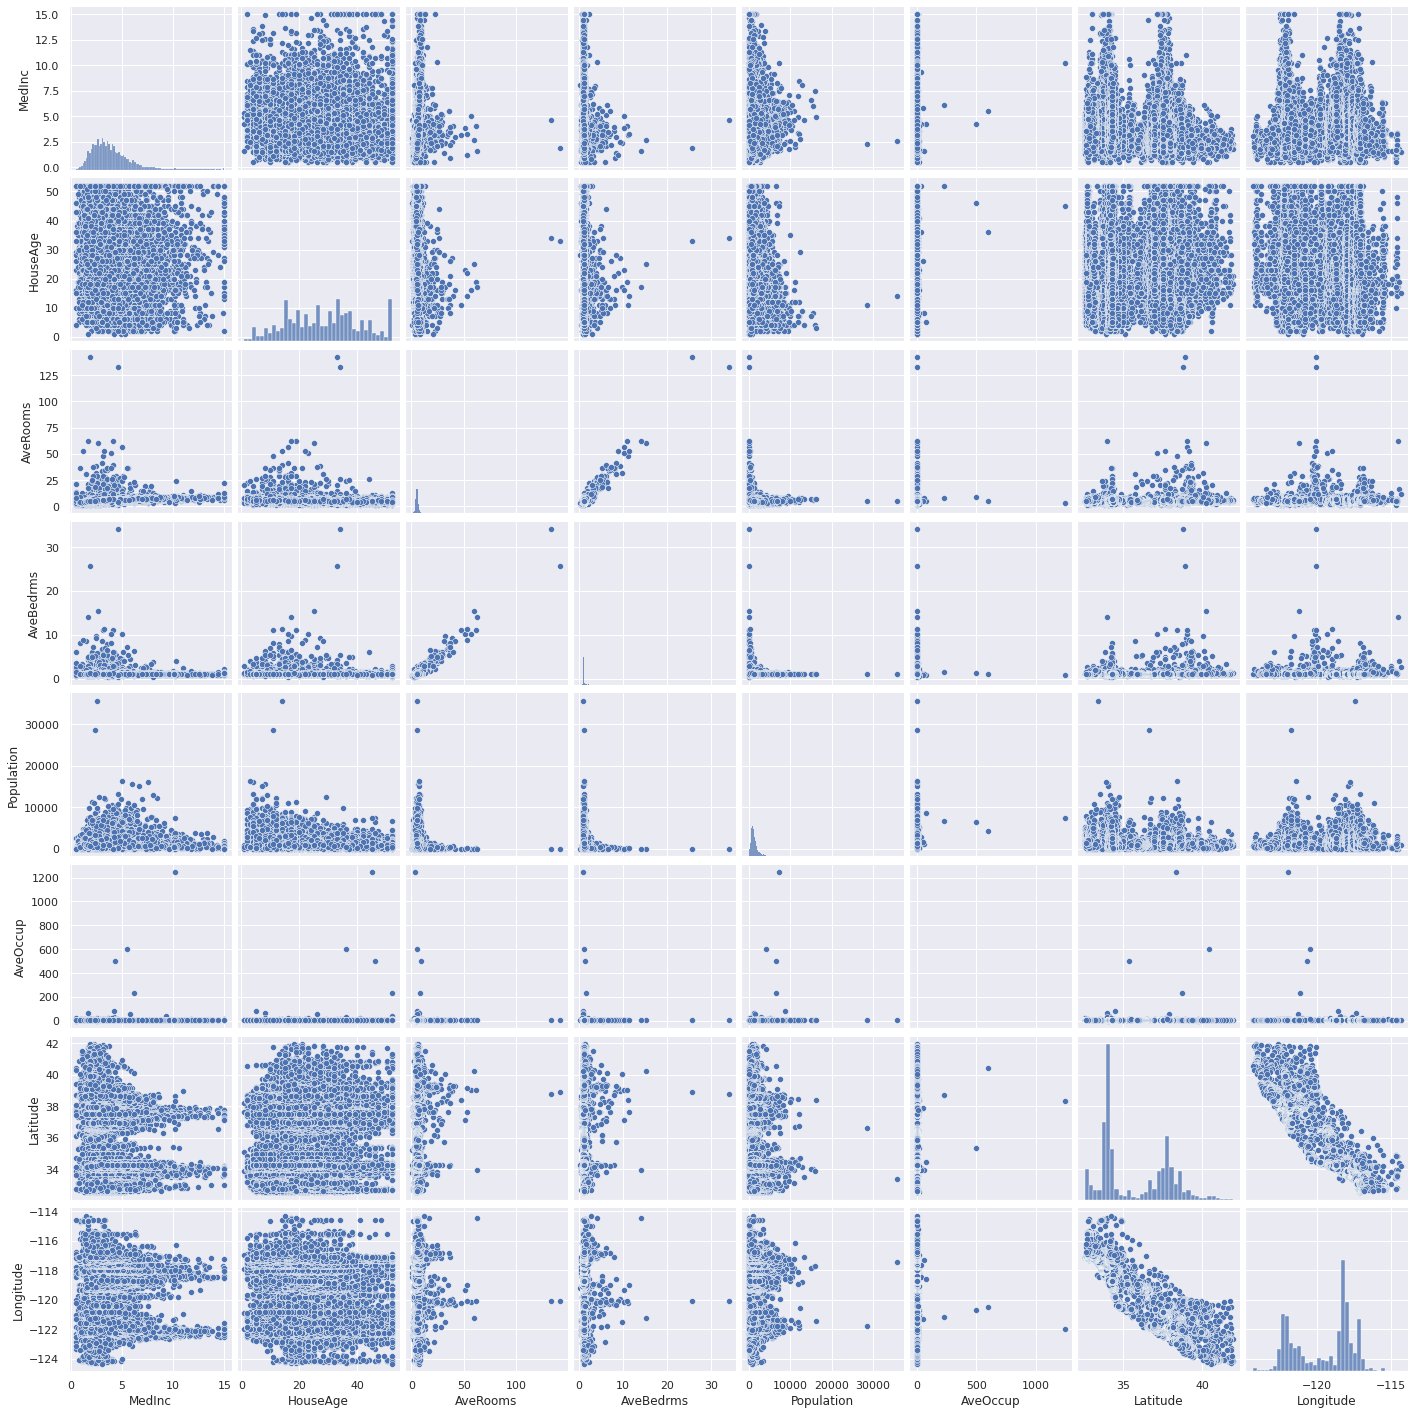

In [ ]:
sns.pairplot(X)

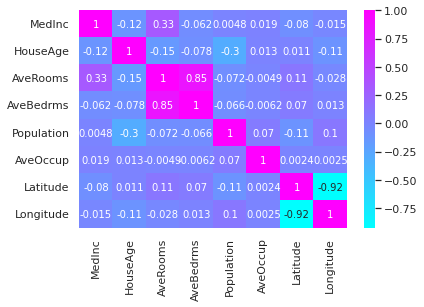

In [ ]:
sns.heatmap(X.corr(),cmap='cool',annot=True)

Longitude and Latitude are highly correlated with each other

AveRooms and AveBedrms are highly correlated with each other

# Dealing with Multicollinearity

The Variance Inflation factor (VIF) will be used to determine which variables are redundant for the regression model because of multicolinnearity. A VIF value of 10 or more is a sign of high multicollinearity.

One by one the variable with the highest VIF will be removed from the dataset until all variables have a VIF value less than 10.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

In [ ]:
#create VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculate VIF 
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)


      feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


Longitude variable should be removed first as it has the highest VIF value

In [ ]:
# Recalculating VIF without Longitude variable

X_vif = X[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude']]

#create VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns

# calculate VIF 
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]
  
print(vif_data)


      feature        VIF
0      MedInc   9.865861
1    HouseAge   6.880512
2    AveRooms  42.192223
3   AveBedrms  39.768396
4  Population   2.793169
5    AveOccup   1.094908
6    Latitude  22.498755


AveRooms shall be removed next

In [ ]:
# Recalculating VIF without Longitude variable

X_vif = X[['MedInc','HouseAge','AveBedrms','Population','AveOccup','Latitude']]

#create VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns

# calculate VIF 
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]
  
print(vif_data)

      feature        VIF
0      MedInc   5.036342
1    HouseAge   6.660725
2   AveBedrms   6.430073
3  Population   2.752356
4    AveOccup   1.094801
5    Latitude  21.922515


Latitude will be removed next

In [ ]:
# Recalculating VIF without Longitude variable

X_vif = X[['MedInc','HouseAge','AveBedrms','Population','AveOccup']]

#create VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns

# calculate VIF 
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]
  
print(vif_data)

      feature       VIF
0      MedInc  3.801038
1    HouseAge  3.769898
2   AveBedrms  4.263506
3  Population  2.222516
4    AveOccup  1.094644


The resulting dataset after adressing multicollinearity has the variables *MedInc*, *HouseAge*, *AveBedrms*, *Population* and *AveOccup*

# Standardise variables

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_sd = scaler.fit_transform(X_vif)

# Train and split data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sd, y, test_size = 0.3)

# Cross validation

In [ ]:
from sklearn.model_selection import RepeatedKFold

In [ ]:
# K = 5
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)


## SGD Model with Ridge Regression penalty

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
model_ridge = SGDRegressor()

# GridSearch


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#define variables for gridsearch

# try training parameters 
param = {
    'penalty': ['l2'],
    'learning_rate': ['constant', 'optimal', 'invscaling','adaptive'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'eta0' : [0.001, 0.01,0.1,1]
}    

#define search 
search = GridSearchCV(model_ridge, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)


# execute search
start = time()
result = search.fit(X_train, y_train)
train_time = time() - start

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print("\tTraining time: %0.3fs" % train_time)

Best Score: -0.6043923100263737
Best Hyperparameters: {'alpha': 1e-05, 'eta0': 0.001, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	Training time: 31.622s


# SGD Model with Elastic Net penalty

In [ ]:
#define variables
X2, y2 = fetch_california_housing(return_X_y=True, as_frame = True)

#define model
model_elastic = SGDRegressor()

#scale data
scaler = StandardScaler()
X2_sd = scaler.fit_transform(X2)

#train and split data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_sd, y2, test_size = 0.3)

# GridSearch


In [ ]:
#define variables for gridsearch
param = {
    'penalty': ['elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling','adaptive'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
    'eta0' : [0.001, 0.01,0.1,1],
    'l1_ratio': [0.15, 0.20]
}    

#define search 
search2 = GridSearchCV(model_elastic, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)


# execute search
start = time()
result2 = search2.fit(X_train2, y_train2)
train_time = time() - start

# summarize result
print('Best Score: %s' % result2.best_score_)
print('Best Hyperparameters: %s' % result2.best_params_)
print("\tTraining time: %0.3fs" % train_time)

Best Score: -0.5303798901027375
Best Hyperparameters: {'alpha': 1e-05, 'eta0': 1, 'l1_ratio': 0.15, 'learning_rate': 'adaptive', 'penalty': 'elasticnet'}
	Training time: 152.780s


From the negative mean absolute error values of both models, the model with the Elastic Net penality is a better performing model. However, it takes 4 times as long to train as compared to the model with Ridge regression. 

# Model Evaluations 

Let's see how the models perform on unseen data.

In [ ]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [ ]:
# 'ridge' regression model predictions

y_pred = result.predict(X_test)
predict_time = time()- start 
print(" Linear Regression with Ridge penalty")   
print("\tPrediction time: %0.3fs" % predict_time)
print("\tExplained variance:", explained_variance_score(y_test, y_pred))
print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
print("\tR2 score:", r2_score(y_test, y_pred))
print()


# 'elastic net' regression model predictions

y_pred = result2.predict(X_test2)
predict_time = time()- start    
print(" Linear Regression with Elastic net penalty")
print("\tPrediction time: %0.3fs" % predict_time)
print("\tExplained variance:", explained_variance_score(y_test2, y_pred))
print("\tMean absolute error:", mean_absolute_error(y_test2, y_pred))
print("\tR2 score:", r2_score(y_test2, y_pred))
print()

 Linear Regression with Ridge penalty
	Prediction time: 2584.295s
	Explained variance: 0.5110228500019496
	Mean absolute error: 0.595848063458426
	R2 score: 0.5110005923558352

 Linear Regression with Elastic net penalty
	Prediction time: 2584.304s
	Explained variance: 0.593847843042308
	Mean absolute error: 0.5312290086611239
	R2 score: 0.5937738586350874



The Linear Regression model with Elastic Net penalty performs better. The R2 score of 0.59 indicates that about 60% of the variation the median house value (y) can be explained with the model.